<a id='top'></a>
# MAST Table Access Protocol PanSTARRS 1 DR2 Demo

<br> This tutorial demonstrates how to use astroquery to access PanSTARRS 1 Data Release 2 via a Virtual Observatory standard Table Access Protocol (TAP) service at MAST, and work with the resultant data. It relies on Python 3 and astroquery, as well as some other common scientific packages.

***
### Table of Contents

1. [TAP Service Introduction](#TAP-Service-Introduction)
2. [Imports](#Imports)
3. [Connecting to a TAP Service](#Connecting-to-a-TAP-Service)
4. [Use Cases](#Use-Cases)
5. [Additional Resources](#Additional-Resources)
6. [About This Notebook](#About-this-Notebook)
***

## TAP Service Introduction

Table Access Protocol (TAP) services allow more direct and flexible access to astronomical data than the simpler types of IVOA standard data services. Queries are built with the SQL-like Astronomical Data Query Language (ADQL), and can include geographic / spatial queries as well as filtering on other characteristics of the data. This also allows the user fine-grained control over the returned columns, unlike the fixed set of coumns returned from cone, image, and spectral services.

For this example, we'll be using the astropy affiliated PyVO client, which is interoperable with other valid TAP services, including those at MAST. PyVO documentation is available at ReadTheDocs: https://pyvo.readthedocs.io

We'll be using PyVO to call the TAP service at MAST serving PanSTARRS 1 Data Release 2, now with individual detection information. The schema is described within the service, and we'll show how to inspect it. The schema is also the same as the one available via the CasJobs interface, with an additional view added for the most common positional queries. CasJobs has its own copy of the schema documentation, which can be accessed through its own site: http://mastweb.stsci.edu/ps1casjobs/



***
## Imports

In [1]:
# Use the pyvo library as our client to the data service.
import pyvo as vo

# For resolving objects with tools from MAST
from astroquery.mast import Mast

# For handling ordinary astropy Tables in responses
from astropy.table import Table

# For displaying and manipulating some types of results
%matplotlib inline
import requests
import astropy
import numpy as np
import pylab
import time
import json
from matplotlib import pyplot as plt

# suppress unimportant unit warnings from many TAP services
import warnings
warnings.filterwarnings("ignore", module="astropy.io.votable.*")
warnings.filterwarnings("ignore", module="pyvo.utils.xml.elements")

***
## Connecting to a TAP Service

The PyVO library is able to connect to any TAP service, given the "base" URL as noted in metadata registry resources describing the service. This is the URL for the PanSTARRS 1 DR2 TAP service.

In [2]:
TAP_service = vo.dal.TAPService("https://mast.stsci.edu/vo-tap/api/v0.1/ps1dr2/")
TAP_service.describe()

Capability ivo://ivoa.net/std/TAP

Interface vs:ParamHTTP
    https://mast.stsci.edu/vo-tap/api/v0.1/ps1dr2

Language ADQL
Output format application/x-votable+xml
    Also available as votable

Output format text/csv;header=present
    Also available as csv

Maximum size of resultsets
    Default 100000 row
    Maximum 100000 row


Capability ivo://ivoa.net/std/DALI#examples

Interface vr:WebBrowser
    https://mast.stsci.edu/vo-tap/api/v0.1/ps1dr2/examples




### List available tables

In [3]:
TAP_tables = TAP_service.tables
for tablename in TAP_tables.keys():
    if not "tap_schema" in tablename:  
        TAP_tables[tablename].describe()
        print("Columns={}".format(sorted([k.name for k in TAP_tables[tablename].columns ])))
        print("----")

dbo.Detection
No description

Columns=['airMass', 'apFillF', 'apFlux', 'apFluxErr', 'apRadius', 'dec', 'decErr', 'detectID', 'dvoRegionID', 'expTime', 'extNSigma', 'filterID', 'imageID', 'infoFlag', 'infoFlag2', 'infoFlag3', 'ippDetectID', 'ippObjID', 'kronFlux', 'kronFluxErr', 'kronRad', 'momentM3C', 'momentM3S', 'momentM4C', 'momentM4S', 'momentR1', 'momentRH', 'momentXX', 'momentXY', 'momentYY', 'objID', 'obsTime', 'pltScale', 'posAngle', 'processingVersion', 'psfChiSq', 'psfCore', 'psfFlux', 'psfFluxErr', 'psfLikelihood', 'psfMajorFWHM', 'psfMinorFWHM', 'psfQf', 'psfQfPerfect', 'psfTheta', 'ra', 'raErr', 'randomDetID', 'sky', 'skyErr', 'surveyID', 'telluricExt', 'uniquePspsP2id', 'xPos', 'xPosErr', 'yPos', 'yPosErr', 'zp']
----
dbo.DetectionFlags
No description

Columns=['"value"', 'description', 'hexadecimal', 'name']
----


dbo.DetectionFlags2
No description

Columns=['"value"', 'description', 'hexadecimal', 'name']
----
dbo.DetectionFlags3
No description

Columns=['"value"', 'description', 'hexadecimal', 'name']
----


dbo.DetectionObjectView
No description

Columns=['airMass', 'apFillF', 'apFlux', 'apFluxErr', 'apRadius', 'b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'dec', 'decErr', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'detectID', 'dvoRegionID', 'epochMean', 'expTime', 'extNSigma', 'filterID', 'gFlags', 'gMeanApMag', 'gMeanApMagErr', 'gMeanApMagNpt', 'gMeanApMagStd', 'gMeanKronMag', 'gMeanKronMagErr', 'gMeanKronMagNpt', 'gMeanKronMagStd', 'gMeanPSFMag', 'gMeanPSFMagErr', 'gMeanPSFMagMax', 'gMeanPSFMagMin', 'gMeanPSFMagNpt', 'gMeanPSFMagStd', 'gQfPerfect', 'htmID', 'iFlags', 'iMeanApMag', 'iMeanApMagErr', 'iMeanApMagNpt', 'iMeanApMagStd', 'iMeanKronMag', 'iMeanKronMagErr', 'iMeanKronMagNpt', 'iMeanKronMagStd', 'iMeanPSFMag', 'iMeanPSFMagErr', 'iMeanPSFMagMax', 'iMeanPSFMagMin', 'iMeanPSFMagNpt', 'iMeanPSFMagStd', 'iQfPerfect', 'imageID', 'infoFlag', 'infoFlag2', 'infoFlag3', 'ippObjID', 'kronFlux', 'kronFluxErr', 'kronRad', 'l', 'lambda', 'momentM3C', 'momentM3S', 'momentM4C', 'momentM4S'

dbo.DiffDetEffMeta
No description

Columns=['counts01', 'counts02', 'counts03', 'counts04', 'counts05', 'counts06', 'counts07', 'counts08', 'counts09', 'counts10', 'counts11', 'counts12', 'counts13', 'diffImageID', 'diffMean01', 'diffMean02', 'diffMean03', 'diffMean04', 'diffMean05', 'diffMean06', 'diffMean07', 'diffMean08', 'diffMean09', 'diffMean10', 'diffMean11', 'diffMean12', 'diffMean13', 'diffStdev01', 'diffStdev02', 'diffStdev03', 'diffStdev04', 'diffStdev05', 'diffStdev06', 'diffStdev07', 'diffStdev08', 'diffStdev09', 'diffStdev10', 'diffStdev11', 'diffStdev12', 'diffStdev13', 'errMean01', 'errMean02', 'errMean03', 'errMean04', 'errMean05', 'errMean06', 'errMean07', 'errMean08', 'errMean09', 'errMean10', 'errMean11', 'errMean12', 'errMean13', 'magref', 'nInjected', 'offset01', 'offset02', 'offset03', 'offset04', 'offset05', 'offset06', 'offset07', 'offset08', 'offset09', 'offset10', 'offset11', 'offset12', 'offset13']
----
dbo.DiffDetObject
No description

Columns=['b', 'batchI

dbo.DiffDetObjectView
No description

Columns=['DapFillF', 'DapFlux', 'DapFluxErr', 'DinfoFlag', 'DinfoFlag2', 'DinfoFlag3', 'DkronFlux', 'DkronFluxErr', 'DkronRad', 'DmomentR1', 'DmomentRH', 'DmomentXX', 'DmomentXY', 'DmomentYY', 'DpsfChiSq', 'DpsfCore', 'DpsfFlux', 'DpsfFluxErr', 'DpsfLikelihood', 'DpsfMajorFWHM', 'DpsfMinorFWHM', 'DpsfQf', 'DpsfQfPerfect', 'DpsfTheta', 'Dsky', 'DskyErr', 'airMass', 'b', 'batchID', 'beta', 'ccdID', 'cx', 'cy', 'cz', 'dec', 'decErr', 'diffFPosRatio', 'diffNPos', 'diffNPosAll', 'diffNPosMask', 'diffNPosRatio', 'diffNegDist', 'diffNegSN', 'diffObjAltName1', 'diffObjAltName2', 'diffObjAltName3', 'diffObjID', 'diffObjName', 'diffPosDist', 'diffPosSN', 'dvoRegionID', 'expTime', 'filterID', 'fromPosImage', 'gQfPerfect', 'htmID', 'iQfPerfect', 'ippObjID', 'l', 'lambda', 'nDetections', 'ng', 'ni', 'nr', 'ny', 'nz', 'objInfoFlag', 'obsTime', 'pltScale', 'posAngle', 'processingVersion', 'projectionID', 'qualityFlag', 'rQfPerfect', 'ra', 'raErr', 'randomDiffObjI

dbo.DiffToImage
No description

Columns=['diffImageID', 'imageID']
----
dbo.DiffType
No description

Columns=['description', 'diffTypeID', 'name']
----


dbo.Filter
No description

Columns=['filterID', 'filterType']
----
dbo.FitModel
No description

Columns=['description', 'fitModelID', 'name', 'param1', 'param10', 'param2', 'param3', 'param4', 'param5', 'param6', 'param7', 'param8', 'param9']
----


dbo.ForcedGalaxyModelView
No description

Columns=['b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gGalChisq', 'gGalFlags', 'gGalIndex', 'gGalMag', 'gGalMagErr', 'gGalMajor', 'gGalMajorErr', 'gGalMinor', 'gGalMinorErr', 'gGalPhi', 'galModelType', 'gippDetectID', 'gstackImageID', 'htmID', 'iGalChisq', 'iGalFlags', 'iGalIndex', 'iGalMag', 'iGalMagErr', 'iGalMajor', 'iGalMajorErr', 'iGalMinor', 'iGalMinorErr', 'iGalPhi', 'iippDetectID', 'ippObjID', 'istackImageID', 'l', 'lambda', 'nDetections', 'nFilter', 'nStackDetections', 'nStackObjectRows', 'ng', 'ni', 'nr', 'ny', 'nz', 'objAltName1', 'objAltName2', 'objAltName3', 'objID', 'objInfoFlag', 'objName', 'posMeanChisq', 'processingVersion', 'projectionID', 'qualityFlag', 'rGalChisq', 'rGalFlags', 'rGalIndex', 'rGalMag', 'rGalMagErr', 'rGalMajor', 'rGalMajorErr', 'rGalMinor', 'rGalMinorErr', 'rGalPhi', 'raMean', 'raMeanErr', 'raStack', 'raStackErr', 'randomID', 'rippD

dbo.ForcedGalaxyShapeFlags
No description

Columns=['"value"', 'description', 'hexadecimal', 'name']
----
dbo.ForcedMeanLensing
No description

Columns=['batchID', 'gLensObjShearE1', 'gLensObjShearE2', 'gLensObjShearX11', 'gLensObjShearX12', 'gLensObjShearX22', 'gLensObjSmearE1', 'gLensObjSmearE2', 'gLensObjSmearX11', 'gLensObjSmearX12', 'gLensObjSmearX22', 'gLensPSFShearE1', 'gLensPSFShearE2', 'gLensPSFShearX11', 'gLensPSFShearX12', 'gLensPSFShearX22', 'gLensPSFSmearE1', 'gLensPSFSmearE2', 'gLensPSFSmearX11', 'gLensPSFSmearX12', 'gLensPSFSmearX22', 'iLensObjShearE1', 'iLensObjShearE2', 'iLensObjShearX11', 'iLensObjShearX12', 'iLensObjShearX22', 'iLensObjSmearE1', 'iLensObjSmearE2', 'iLensObjSmearX11', 'iLensObjSmearX12', 'iLensObjSmearX22', 'iLensPSFShearE1', 'iLensPSFShearE2', 'iLensPSFShearX11', 'iLensPSFShearX12', 'iLensPSFShearX22', 'iLensPSFSmearE1', 'iLensPSFSmearE2', 'iLensPSFSmearX11', 'iLensPSFSmearX12', 'iLensPSFSmearX22', 'ippObjID', 'nDetections', 'objID', 'processingVersi

dbo.ForcedMeanObject
No description

Columns=['batchID', 'gE1', 'gE2', 'gFApFlux', 'gFApFluxErr', 'gFApFluxStd', 'gFApMag', 'gFApMagErr', 'gFKronFlux', 'gFKronFluxErr', 'gFKronFluxStd', 'gFKronMag', 'gFKronMagErr', 'gFPSFFlux', 'gFPSFFluxErr', 'gFPSFFluxStd', 'gFPSFMag', 'gFPSFMagErr', 'gFlags', 'gFmeanMagR5', 'gFmeanMagR5Err', 'gFmeanMagR6', 'gFmeanMagR6Err', 'gFmeanMagR7', 'gFmeanMagR7Err', 'gFmeanflxR5', 'gFmeanflxR5Err', 'gFmeanflxR5Fill', 'gFmeanflxR5Std', 'gFmeanflxR6', 'gFmeanflxR6Err', 'gFmeanflxR6Fill', 'gFmeanflxR6Std', 'gFmeanflxR7', 'gFmeanflxR7Err', 'gFmeanflxR7Fill', 'gFmeanflxR7Std', 'gnIncApFlux', 'gnIncKronFlux', 'gnIncPSFFlux', 'gnIncR5', 'gnIncR6', 'gnIncR7', 'gnTotal', 'iE1', 'iE2', 'iFApFlux', 'iFApFluxErr', 'iFApFluxStd', 'iFApMag', 'iFApMagErr', 'iFKronFlux', 'iFKronFluxErr', 'iFKronFluxStd', 'iFKronMag', 'iFKronMagErr', 'iFPSFFlux', 'iFPSFFluxErr', 'iFPSFFluxStd', 'iFPSFMag', 'iFPSFMagErr', 'iFlags', 'iFmeanMagR5', 'iFmeanMagR5Err', 'iFmeanMagR6', 'iFmeanMagR6Er

dbo.ForcedMeanObjectView
No description

Columns=['b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gE1', 'gE2', 'gFApFlux', 'gFApFluxErr', 'gFApFluxStd', 'gFKronFlux', 'gFKronFluxErr', 'gFKronFluxStd', 'gFPSFFlux', 'gFPSFFluxErr', 'gFPSFFluxStd', 'gFlags', 'gFmeanflxR5', 'gFmeanflxR5Err', 'gFmeanflxR5Fill', 'gFmeanflxR5Std', 'gFmeanflxR6', 'gFmeanflxR6Err', 'gFmeanflxR6Fill', 'gFmeanflxR6Std', 'gFmeanflxR7', 'gFmeanflxR7Err', 'gFmeanflxR7Fill', 'gFmeanflxR7Std', 'gnIncApFlux', 'gnIncKronFlux', 'gnIncPSFFlux', 'gnIncR5', 'gnIncR6', 'gnIncR7', 'gnTotal', 'htmID', 'iE1', 'iE2', 'iFApFlux', 'iFApFluxErr', 'iFApFluxStd', 'iFKronFlux', 'iFKronFluxErr', 'iFKronFluxStd', 'iFPSFFlux', 'iFPSFFluxErr', 'iFPSFFluxStd', 'iFlags', 'iFmeanflxR5', 'iFmeanflxR5Err', 'iFmeanflxR5Fill', 'iFmeanflxR5Std', 'iFmeanflxR6', 'iFmeanflxR6Err', 'iFmeanflxR6Fill', 'iFmeanflxR6Std', 'iFmeanflxR7', 'iFmeanflxR7Err', 'iFmeanflxR7Fill', 'iFmean

dbo.ForcedWarpMasked
No description

Columns=['dvoRegionID', 'filterID', 'forcedSummaryID', 'forcedWarpID', 'ippDetectID', 'ippObjID', 'objID', 'obsTime', 'projectionID', 'randomWarpID', 'skyCellID', 'surveyID', 'tessID', 'uniquePspsFWid']
----


dbo.ForcedWarpMeasurement
No description

Columns=['FapFillF', 'FapFlux', 'FapFluxErr', 'FapRadius', 'FccdID', 'FinfoFlag', 'FinfoFlag2', 'FinfoFlag3', 'FkronFlux', 'FkronFluxErr', 'FkronRad', 'FmomentM3C', 'FmomentM3S', 'FmomentM4C', 'FmomentM4S', 'FmomentR1', 'FmomentRH', 'FmomentXX', 'FmomentXY', 'FmomentYY', 'FpsfChiSq', 'FpsfCore', 'FpsfFlux', 'FpsfFluxErr', 'FpsfMajorFWHM', 'FpsfMinorFWHM', 'FpsfQf', 'FpsfQfPerfect', 'FpsfTheta', 'Fsky', 'FskyErr', 'airMass', 'detectID', 'dvoRegionID', 'expTime', 'filterID', 'forcedSummaryID', 'forcedWarpID', 'ippDetectID', 'ippObjID', 'objID', 'obsTime', 'processingVersion', 'projectionID', 'randomWarpID', 'skyCellID', 'surveyID', 'telluricExt', 'tessID', 'uniquePspsFWid', 'xPosChip', 'yPosChip', 'zp']
----
dbo.ForcedWarpMeta
No description

Columns=['analysisVer', 'batchID', 'cdelt1', 'cdelt2', 'crpix1', 'crpix2', 'crval1', 'crval2', 'ctype1', 'ctype2', 'expTime', 'filterID', 'forcedWarpID', 'frameID', 'ippSkycalID', 'md5sum', 'pc001001', 'pc00

dbo.ImageDetEffMeta
No description

Columns=['counts01', 'counts02', 'counts03', 'counts04', 'counts05', 'counts06', 'counts07', 'counts08', 'counts09', 'counts10', 'counts11', 'counts12', 'counts13', 'diffMean01', 'diffMean02', 'diffMean03', 'diffMean04', 'diffMean05', 'diffMean06', 'diffMean07', 'diffMean08', 'diffMean09', 'diffMean10', 'diffMean11', 'diffMean12', 'diffMean13', 'diffStdev01', 'diffStdev02', 'diffStdev03', 'diffStdev04', 'diffStdev05', 'diffStdev06', 'diffStdev07', 'diffStdev08', 'diffStdev09', 'diffStdev10', 'diffStdev11', 'diffStdev12', 'diffStdev13', 'errMean01', 'errMean02', 'errMean03', 'errMean04', 'errMean05', 'errMean06', 'errMean07', 'errMean08', 'errMean09', 'errMean10', 'errMean11', 'errMean12', 'errMean13', 'frameID', 'imageID', 'magref', 'nInjected', 'offset01', 'offset02', 'offset03', 'offset04', 'offset05', 'offset06', 'offset07', 'offset08', 'offset09', 'offset10', 'offset11', 'offset12', 'offset13']
----


dbo.ImageFlags
No description

Columns=['"value"', 'description', 'hexadecimal', 'name']
----
dbo.ImageMeta
No description

Columns=['apResid', 'astroScat', 'bias', 'biasScat', 'ccdID', 'cdelt1', 'cdelt2', 'crpix1', 'crpix2', 'crval1', 'crval2', 'ctype1', 'ctype2', 'dapResid', 'detectionThreshold', 'detectorID', 'detrend1', 'detrend2', 'detrend3', 'detrend4', 'detrend5', 'detrend6', 'detrend7', 'detrend8', 'filterID', 'frameID', 'imageID', 'momentM2C', 'momentM2S', 'momentM3', 'momentM4', 'momentMajor', 'momentMinor', 'nAstroRef', 'nAxis1', 'nAxis2', 'nDetect', 'nPhotoRef', 'pc001001', 'pc001002', 'pc002001', 'pc002002', 'pca1x0y2', 'pca1x0y3', 'pca1x1y1', 'pca1x1y2', 'pca1x2y0', 'pca1x2y1', 'pca1x3y0', 'pca2x0y2', 'pca2x0y3', 'pca2x1y1', 'pca2x1y2', 'pca2x2y0', 'pca2x2y1', 'pca2x3y0', 'photoCalID', 'photoScat', 'photoZero', 'polyOrder', 'processingVersion', 'psfFWHM', 'psfModelID', 'psfTheta', 'psfWidMajor', 'psfWidMinor', 'qaFlags', 'recalAstroScatX', 'recalAstroScatY', 'recalNAstroS

dbo.MeanObjectView
No description

Columns=['b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gFlags', 'gMeanApMag', 'gMeanApMagErr', 'gMeanApMagNpt', 'gMeanApMagStd', 'gMeanKronMag', 'gMeanKronMagErr', 'gMeanKronMagNpt', 'gMeanKronMagStd', 'gMeanPSFMag', 'gMeanPSFMagErr', 'gMeanPSFMagMax', 'gMeanPSFMagMin', 'gMeanPSFMagNpt', 'gMeanPSFMagStd', 'gQfPerfect', 'htmID', 'iFlags', 'iMeanApMag', 'iMeanApMagErr', 'iMeanApMagNpt', 'iMeanApMagStd', 'iMeanKronMag', 'iMeanKronMagErr', 'iMeanKronMagNpt', 'iMeanKronMagStd', 'iMeanPSFMag', 'iMeanPSFMagErr', 'iMeanPSFMagMax', 'iMeanPSFMagMin', 'iMeanPSFMagNpt', 'iMeanPSFMagStd', 'iQfPerfect', 'ippObjID', 'l', 'lambda', 'nDetections', 'nStackDetections', 'nStackObjectRows', 'ng', 'ni', 'nr', 'ny', 'nz', 'objAltName1', 'objAltName2', 'objAltName3', 'objID', 'objInfoFlag', 'objName', 'posMeanChisq', 'processingVersion', 'projectionID', 'qualityFlag', 'rFlags', 'rMeanApMag', 'rMeanA

dbo.ObjectThin
No description

Columns=['b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'htmID', 'ippObjID', 'l', 'lambda', 'nDetections', 'nStackDetections', 'nStackObjectRows', 'ng', 'ni', 'nr', 'ny', 'nz', 'objAltName1', 'objAltName2', 'objAltName3', 'objID', 'objInfoFlag', 'objName', 'objNameHMS', 'objPopularName', 'posMeanChisq', 'processingVersion', 'projectionID', 'qualityFlag', 'raMean', 'raMeanErr', 'raStack', 'raStackErr', 'randomID', 'skyCellID', 'surveyID', 'tessID', 'uniquePspsOBid', 'zoneID']
----
dbo.PhotoCal
No description

Columns=['AB', 'colorExtn', 'colorterm', 'extinction', 'filterID', 'orphanCalColor', 'orphanCalColorErr', 'photoCalID', 'photoCodeDesc', 'startDate', 'zeropoint']
----
dbo.StackApFlx
No description

Columns=['bestDetection', 'gc6flxR5', 'gc6flxR5Err', 'gc6flxR5Fill', 'gc6flxR5Std', 'gc6flxR6', 'gc6flxR6Err', 'gc6flxR6Fill', 'gc6flxR6Std', 'gc6flxR7', 'gc6flxR7Err', 'gc6flxR7Fil

dbo.StackApFlxExGalCon6
No description

Columns=['bestDetection', 'gc6flxR10', 'gc6flxR10Err', 'gc6flxR10Fill', 'gc6flxR10Std', 'gc6flxR11', 'gc6flxR11Err', 'gc6flxR11Fill', 'gc6flxR11Std', 'gc6flxR3', 'gc6flxR3Err', 'gc6flxR3Fill', 'gc6flxR3Std', 'gc6flxR4', 'gc6flxR4Err', 'gc6flxR4Fill', 'gc6flxR4Std', 'gc6flxR5', 'gc6flxR5Err', 'gc6flxR5Fill', 'gc6flxR5Std', 'gc6flxR6', 'gc6flxR6Err', 'gc6flxR6Fill', 'gc6flxR6Std', 'gc6flxR7', 'gc6flxR7Err', 'gc6flxR7Fill', 'gc6flxR7Std', 'gc6flxR8', 'gc6flxR8Err', 'gc6flxR8Fill', 'gc6flxR8Std', 'gc6flxR9', 'gc6flxR9Err', 'gc6flxR9Fill', 'gc6flxR9Std', 'gippDetectID', 'gstackDetectID', 'gstackImageID', 'ic6flxR10', 'ic6flxR10Err', 'ic6flxR10Fill', 'ic6flxR10Std', 'ic6flxR11', 'ic6flxR11Err', 'ic6flxR11Fill', 'ic6flxR11Std', 'ic6flxR3', 'ic6flxR3Err', 'ic6flxR3Fill', 'ic6flxR3Std', 'ic6flxR4', 'ic6flxR4Err', 'ic6flxR4Fill', 'ic6flxR4Std', 'ic6flxR5', 'ic6flxR5Err', 'ic6flxR5Fill', 'ic6flxR5Std', 'ic6flxR6', 'ic6flxR6Err', 'ic6flxR6Fill', 'ic6flxR6Std

dbo.StackApFlxExGalCon8ObjectView
No description

Columns=['b', 'batchID', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gc8flxR10', 'gc8flxR10Err', 'gc8flxR10Fill', 'gc8flxR10Std', 'gc8flxR11', 'gc8flxR11Err', 'gc8flxR11Fill', 'gc8flxR11Std', 'gc8flxR3', 'gc8flxR3Err', 'gc8flxR3Fill', 'gc8flxR3Std', 'gc8flxR4', 'gc8flxR4Err', 'gc8flxR4Fill', 'gc8flxR4Std', 'gc8flxR5', 'gc8flxR5Err', 'gc8flxR5Fill', 'gc8flxR5Std', 'gc8flxR6', 'gc8flxR6Err', 'gc8flxR6Fill', 'gc8flxR6Std', 'gc8flxR7', 'gc8flxR7Err', 'gc8flxR7Fill', 'gc8flxR7Std', 'gc8flxR8', 'gc8flxR8Err', 'gc8flxR8Fill', 'gc8flxR8Std', 'gc8flxR9', 'gc8flxR9Err', 'gc8flxR9Fill', 'gc8flxR9Std', 'gippDetectID', 'gstackDetectID', 'gstackImageID', 'htmID', 'ic8flxR10', 'ic8flxR10Err', 'ic8flxR10Fill', 'ic8flxR10Std', 'ic8flxR11', 'ic8flxR11Err', 'ic8flxR11Fill', 'ic8flxR11Std', 'ic8flxR3', 'ic8flxR3Err', 'ic8flxR3Fill', 'ic8flxR3Std', 'ic8flxR4', 'ic8flxR4Err', 'ic8flxR4Fill', 'ic8

dbo.StackApFlxObjectView
No description

Columns=['b', 'batchID', 'bestDetection', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gc6flxR5', 'gc6flxR5Err', 'gc6flxR5Fill', 'gc6flxR5Std', 'gc6flxR6', 'gc6flxR6Err', 'gc6flxR6Fill', 'gc6flxR6Std', 'gc6flxR7', 'gc6flxR7Err', 'gc6flxR7Fill', 'gc6flxR7Std', 'gc8flxR5', 'gc8flxR5Err', 'gc8flxR5Fill', 'gc8flxR5Std', 'gc8flxR6', 'gc8flxR6Err', 'gc8flxR6Fill', 'gc8flxR6Std', 'gc8flxR7', 'gc8flxR7Err', 'gc8flxR7Fill', 'gc8flxR7Std', 'gflxR5', 'gflxR5Err', 'gflxR5Fill', 'gflxR5Std', 'gflxR6', 'gflxR6Err', 'gflxR6Fill', 'gflxR6Std', 'gflxR7', 'gflxR7Err', 'gflxR7Fill', 'gflxR7Std', 'gippDetectID', 'gstackDetectID', 'gstackImageID', 'htmID', 'ic6flxR5', 'ic6flxR5Err', 'ic6flxR5Fill', 'ic6flxR5Std', 'ic6flxR6', 'ic6flxR6Err', 'ic6flxR6Fill', 'ic6flxR6Std', 'ic6flxR7', 'ic6flxR7Err', 'ic6flxR7Fill', 'ic6flxR7Std', 'ic8flxR5', 'ic8flxR5Err', 'ic8flxR5Fill', 'ic8flxR5Std', 'ic8flxR6', 'ic8flxR6

dbo.StackModelFitDeVObjectView
No description

Columns=['b', 'batchID', 'bestDetection', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gDeVAb', 'gDeVAbErr', 'gDeVChisq', 'gDeVDec', 'gDeVDecErr', 'gDeVMag', 'gDeVMagErr', 'gDeVPhi', 'gDeVPhiErr', 'gDeVRa', 'gDeVRaErr', 'gDeVRadius', 'gDeVRadiusErr', 'gippDetectID', 'gstackDetectID', 'gstackImageID', 'htmID', 'iDeVAb', 'iDeVAbErr', 'iDeVChisq', 'iDeVDec', 'iDeVDecErr', 'iDeVMag', 'iDeVMagErr', 'iDeVPhi', 'iDeVPhiErr', 'iDeVRa', 'iDeVRaErr', 'iDeVRadius', 'iDeVRadiusErr', 'iippDetectID', 'ippObjID', 'istackDetectID', 'istackImageID', 'l', 'lambda', 'nDetections', 'nStackDetections', 'nStackObjectRows', 'ng', 'ni', 'nr', 'ny', 'nz', 'objAltName1', 'objAltName2', 'objAltName3', 'objID', 'objInfoFlag', 'objName', 'posMeanChisq', 'primaryDetection', 'processingVersion', 'projectionID', 'qualityFlag', 'rDeVAb', 'rDeVAbErr', 'rDeVChisq', 'rDeVDec', 'rDeVDecErr', 'rDeVMag', 'rDeVMagErr'

dbo.StackModelFitExtra
No description

Columns=['bestDetection', 'gS2', 'gbumpy', 'ghalfLightRad', 'gippDetectID', 'glogRA', 'glogRT', 'gstackDetectID', 'gstackImageID', 'iS2', 'ibumpy', 'ihalfLightRad', 'iippDetectID', 'ilogRA', 'ilogRT', 'ippObjID', 'istackDetectID', 'istackImageID', 'objID', 'primaryDetection', 'rS2', 'randomStackObjID', 'rbumpy', 'rhalfLightRad', 'rippDetectID', 'rlogRA', 'rlogRT', 'rstackDetectID', 'rstackImageID', 'uniquePspsSTid', 'yS2', 'ybumpy', 'yhalfLightRad', 'yippDetectID', 'ylogRA', 'ylogRT', 'ystackDetectID', 'ystackImageID', 'zS2', 'zbumpy', 'zhalfLightRad', 'zippDetectID', 'zlogRA', 'zlogRT', 'zstackDetectID', 'zstackImageID']
----
dbo.StackModelFitPetObjectView
No description

Columns=['b', 'batchID', 'bestDetection', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gippDetectID', 'gpetCf', 'gpetMag', 'gpetMagErr', 'gpetR50', 'gpetR50Err', 'gpetR90', 'gpetR90Err', 'gpetRadius', 'gpetRadiusErr',

dbo.StackModelFitSerObjectView
No description

Columns=['b', 'batchID', 'bestDetection', 'beta', 'cx', 'cy', 'cz', 'decMean', 'decMeanErr', 'decStack', 'decStackErr', 'dvoRegionID', 'epochMean', 'gSerAb', 'gSerAbErr', 'gSerChisq', 'gSerDec', 'gSerDecErr', 'gSerMag', 'gSerMagErr', 'gSerNu', 'gSerNuErr', 'gSerPhi', 'gSerPhiErr', 'gSerRa', 'gSerRaErr', 'gSerRadius', 'gSerRadiusErr', 'gippDetectID', 'gstackDetectID', 'gstackImageID', 'htmID', 'iSerAb', 'iSerAbErr', 'iSerChisq', 'iSerDec', 'iSerDecErr', 'iSerMag', 'iSerMagErr', 'iSerNu', 'iSerNuErr', 'iSerPhi', 'iSerPhiErr', 'iSerRa', 'iSerRaErr', 'iSerRadius', 'iSerRadiusErr', 'iippDetectID', 'ippObjID', 'istackDetectID', 'istackImageID', 'l', 'lambda', 'nDetections', 'nStackDetections', 'nStackObjectRows', 'ng', 'ni', 'nr', 'ny', 'nz', 'objAltName1', 'objAltName2', 'objAltName3', 'objID', 'objInfoFlag', 'objName', 'posMeanChisq', 'primaryDetection', 'processingVersion', 'projectionID', 'qualityFlag', 'rSerAb', 'rSerAbErr', 'rSerChisq', 'r

dbo.StackObjectThin
No description

Columns=['bestDetection', 'dvoRegionID', 'gApMag', 'gApMagErr', 'gEpoch', 'gKronMag', 'gKronMagErr', 'gPSFMag', 'gPSFMagErr', 'gdec', 'gdecErr', 'ginfoFlag', 'ginfoFlag2', 'ginfoFlag3', 'ginfoFlag4', 'gippDetectID', 'gnFrames', 'gra', 'graErr', 'gstackDetectID', 'gstackImageID', 'iApMag', 'iApMagErr', 'iEpoch', 'iKronMag', 'iKronMagErr', 'iPSFMag', 'iPSFMagErr', 'idec', 'idecErr', 'iinfoFlag', 'iinfoFlag2', 'iinfoFlag3', 'iinfoFlag4', 'iippDetectID', 'inFrames', 'ippObjID', 'ira', 'iraErr', 'istackDetectID', 'istackImageID', 'objID', 'primaryDetection', 'processingVersion', 'projectionID', 'rApMag', 'rApMagErr', 'rEpoch', 'rKronMag', 'rKronMagErr', 'rPSFMag', 'rPSFMagErr', 'randomStackObjID', 'rdec', 'rdecErr', 'rinfoFlag', 'rinfoFlag2', 'rinfoFlag3', 'rinfoFlag4', 'rippDetectID', 'rnFrames', 'rra', 'rraErr', 'rstackDetectID', 'rstackImageID', 'skyCellID', 'surveyID', 'tessID', 'uniquePspsSTid', 'yApMag', 'yApMagErr', 'yEpoch', 'yKronMag', 'yKronMagE

dbo.StackPetrosian
No description

Columns=['bestDetection', 'gippDetectID', 'gpetCf', 'gpetMag', 'gpetMagErr', 'gpetR50', 'gpetR50Err', 'gpetR90', 'gpetR90Err', 'gpetRadius', 'gpetRadiusErr', 'gstackDetectID', 'gstackImageID', 'iippDetectID', 'ipetCf', 'ipetMag', 'ipetMagErr', 'ipetR50', 'ipetR50Err', 'ipetR90', 'ipetR90Err', 'ipetRadius', 'ipetRadiusErr', 'ippObjID', 'istackDetectID', 'istackImageID', 'objID', 'primaryDetection', 'randomStackObjID', 'rippDetectID', 'rpetCf', 'rpetMag', 'rpetMagErr', 'rpetR50', 'rpetR50Err', 'rpetR90', 'rpetR90Err', 'rpetRadius', 'rpetRadiusErr', 'rstackDetectID', 'rstackImageID', 'uniquePspsSTid', 'yippDetectID', 'ypetCf', 'ypetMag', 'ypetMagErr', 'ypetR50', 'ypetR50Err', 'ypetR90', 'ypetR90Err', 'ypetRadius', 'ypetRadiusErr', 'ystackDetectID', 'ystackImageID', 'zippDetectID', 'zpetCf', 'zpetMag', 'zpetMagErr', 'zpetR50', 'zpetR50Err', 'zpetR90', 'zpetR90Err', 'zpetRadius', 'zpetRadiusErr', 'zstackDetectID', 'zstackImageID']
----
dbo.StackToFrame
No 

dbo.TessellationType
No description

Columns=['description', 'name', 'tessID']
----


# Use Cases

## Simple Positional Query

This searches the mean object catalog for objects within .2 degrees of M87 (RA=187.706, Dec=12.391 in degrees). The view used contains information from the [ObjectThin](https://outerspace.stsci.edu/x/W4Oc) table (which has information on object positions and the number of available measurements) and the [MeanObject](https://outerspace.stsci.edu/x/WYOc) table (which has information on photometry averaged over the multiple epochs of observation).

Note that the results are restricted to objects with `nDetections>1`, where `nDetections` is the total number of times the object was detected on the single-epoch images in any filter at any time.  Objects with `nDetections=1` tend to be  artifacts, so this is a quick way to eliminate most spurious objects from the catalog.

This query runs in TAP's asynchronous mode, which is a queued batch mode with some overhead and longer timeouts, useful for big catalogs like PanSTARRS. It may not be necessary for all queries to PS1 DR2, but the PyVO client can automatically handle the additional processing required over synchronous mode.

In [4]:
job = TAP_service.run_async("""
SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',187.706,12.391,.2))=1
AND nDetections > 1
  """)
TAP_results = job.to_table()
TAP_results

<Table length=6927>
      objID              RAMean       ... zMeanPSFMag yMeanPSFMag
                          deg         ...     mag         mag    
      int64             float64       ...   float32     float32  
------------------ ------------------ ... ----------- -----------
122861877059169881 187.70591003309602 ...      11.342      11.557
122861877056308967       187.70559948 ...      -999.0     14.9985
122871877063310741 187.70631118732143 ...     14.4249      -999.0
122861877058698594       187.70580919 ...      -999.0     14.7305
122861877050678994 187.70512542608552 ...      -999.0      -999.0
122871877062551436       187.70622365 ...      -999.0     15.1102
122861877044629638       187.70451598 ...     15.5294      -999.0
122861877056688054       187.70558996 ...     14.4064      -999.0
122871877075050430       187.70747912 ...     15.5752      -999.0
               ...                ... ...         ...         ...
123101877313707983       187.73121143 ...     19.9209      -999.0
122901875031002013 187.50314518107095 ...     20.6803     20.2113
122661878055210091 187.80550736264715 ...     19.9956     19.8391
122631877536376320       187.75369336 ...     21.0599      -999.0
123031875562633406 187.55622393040358 ...      -999.0      -999.0
122681878343382931 187.83438155722584 ...     21.0164      -999.0
123061878259604285       187.82588872 ...      -999.0      -999.0
122751878844752179 187.88446793636015 ...     20.0368     19.8008
123001875376856622 187.53785086789503 ...      -999.0      -999.0
123101876640214622 187.66398717765725 ...     21.6726      -999.0

## Get DR2 light curve for RR Lyrae star KQ UMa

This time we start with the object name, use the MAST name resolver (which relies on Simbad and NED) to convert the name to RA and Dec, and then query the PS1 DR2 mean object catalog at that position.  Then we run a spatial query to TAP using those coordinates.

In [5]:
objname = 'KQ UMa'
coords = Mast.resolve_object(objname)
ra,dec = coords.ra.value,coords.dec.value
radius = 1.0/3600.0 # radius = 1 arcsec

query = """
SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, 
    rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',{},{},{}))=1
AND nDetections > 1
""".format(ra,dec,radius)
print(query)

job = TAP_service.run_async(query)
TAP_results = job.to_table()
TAP_results


SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, 
    rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',139.33446271609,68.63508880829,0.0002777777777777778))=1
AND nDetections > 1



<Table length=1>
      objID              RAMean       ... zMeanPSFMag yMeanPSFMag
                          deg         ...     mag         mag    
      int64             float64       ...   float32     float32  
------------------ ------------------ ... ----------- -----------
190361393344112894 139.33445305334158 ...     14.2814     14.3041

### Get Repeated Detection Information

Extract all the objects with the same object ID from the [Detection](https://outerspace.stsci.edu/x/b4Oc) table, which contains all the individual measurements for this source. The results are joined to the [Filter](https://outerspace.stsci.edu/x/nIOc) table to convert the filter numbers to names.

In [6]:
objid = TAP_results['objID'][0]
query = """
SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID={}
ORDER BY filterID, obsTime
""".format(objid)
print(query)

job = TAP_service.run_async(query)
detection_TAP_results = job.to_table()
detection_TAP_results


SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID=190361393344112894
ORDER BY filterID, obsTime



<Table length=66>
      objID             detectID      filterid ...  infoFlag infoFlag2 infoFlag3
                                               ...                              
      int64              int64         uint8   ...   int64     int32     int32  
------------------ ------------------ -------- ... --------- --------- ---------
190361393344112894 153347716310000010        1 ... 102760517       128 124782656
190361393344112894 153348968310000008        1 ... 102760517       128 124782656
190361393344112894 232228791560000017        1 ... 102760517       128 108038208
190361393344112894 255559866370000015        1 ... 102760517       128 124815424
190361393344112894 262040070370000016        1 ... 102760517       128   7374912
190361393344112894 262040708370000014        1 ... 102760517       128   7374912
190361393344112894 264231864260000022        1 ... 102760517       128   7374912
190361393344112894 264232516260000024        1 ... 102760517       128   7374912
190361393344112894 153441340410000012        2 ... 102760517       128 124815424
               ...                ...      ... ...       ...       ...       ...
190361393344112894 183254354520000014        5 ... 102760517       128   7374912
190361393344112894 183255163520000015        5 ... 102760517       128  74483776
190361393344112894 191726725200000011        5 ... 102760517       128   7374912
190361393344112894 191727369200000012        5 ... 102760517       128   7374912
190361393344112894 229122569150000014        5 ... 102760517       128   7374912
190361393344112894 229123273150000011        5 ... 102760517       128   7374912
190361393344112894 264322648150000024        5 ... 102760517       128 124782656
190361393344112894 265623008150000027        5 ... 102760581       128     34880
190361393344112894 287165374630000023        5 ... 102760517       128   7374912
190361393344112894 287265116630000028        5 ... 102760517       128   7342144

### Plot the light curves

The `psfFlux` values from the Detection table are converted from Janskys to AB magnitudes.  Measurements in the 5 different filters are plotted separately.

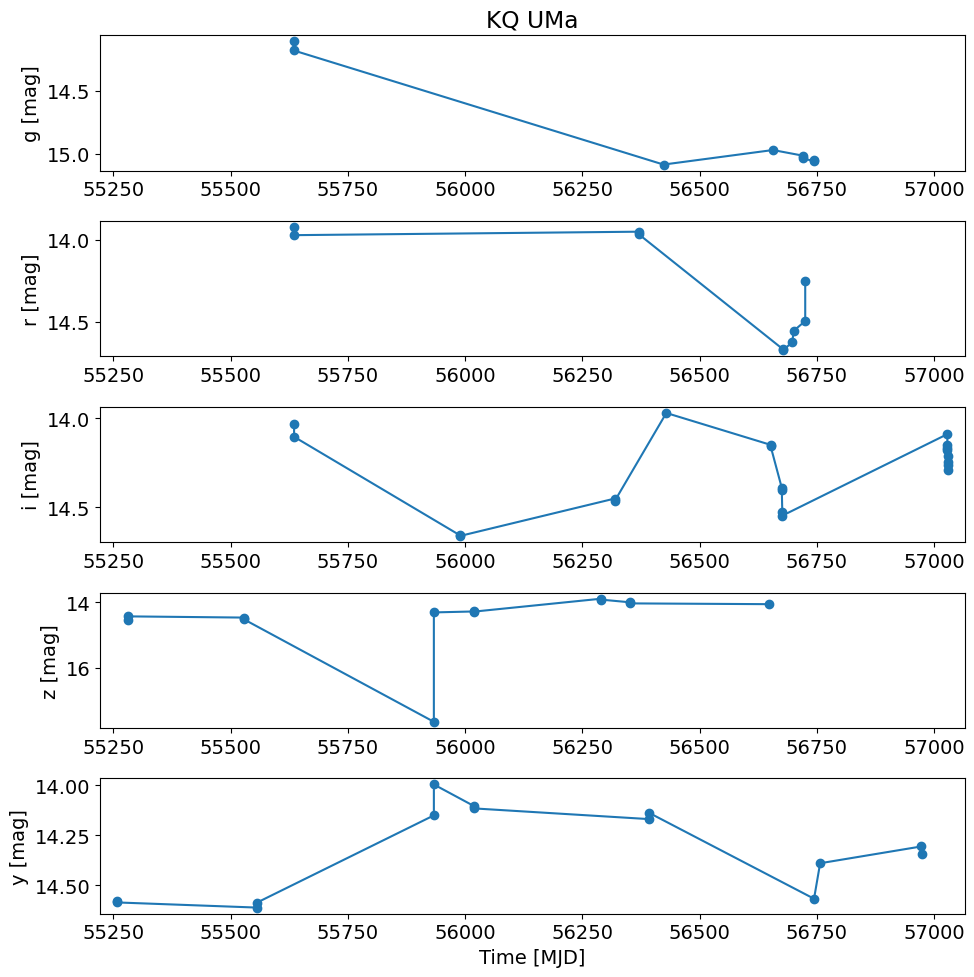

In [7]:
# convert flux in Jy to magnitudes
t = detection_TAP_results['obsTime']
mag = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

#detection_TAP_results['filterType'] is a byte string, compare accordingly:
for i, filter in enumerate(['g','r','i','z','y']):
    
    pylab.subplot(511+i)
    w = np.where(detection_TAP_results['filterType'] == filter)  
    pylab.plot(t[w],mag[w],'-o')
    pylab.ylabel(f'{filter} [mag]')
    pylab.xlim(xlim)
    pylab.gca().invert_yaxis()
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Time [MJD]')
pylab.tight_layout()

Plot differences from the mean magnitudes in the initial search.

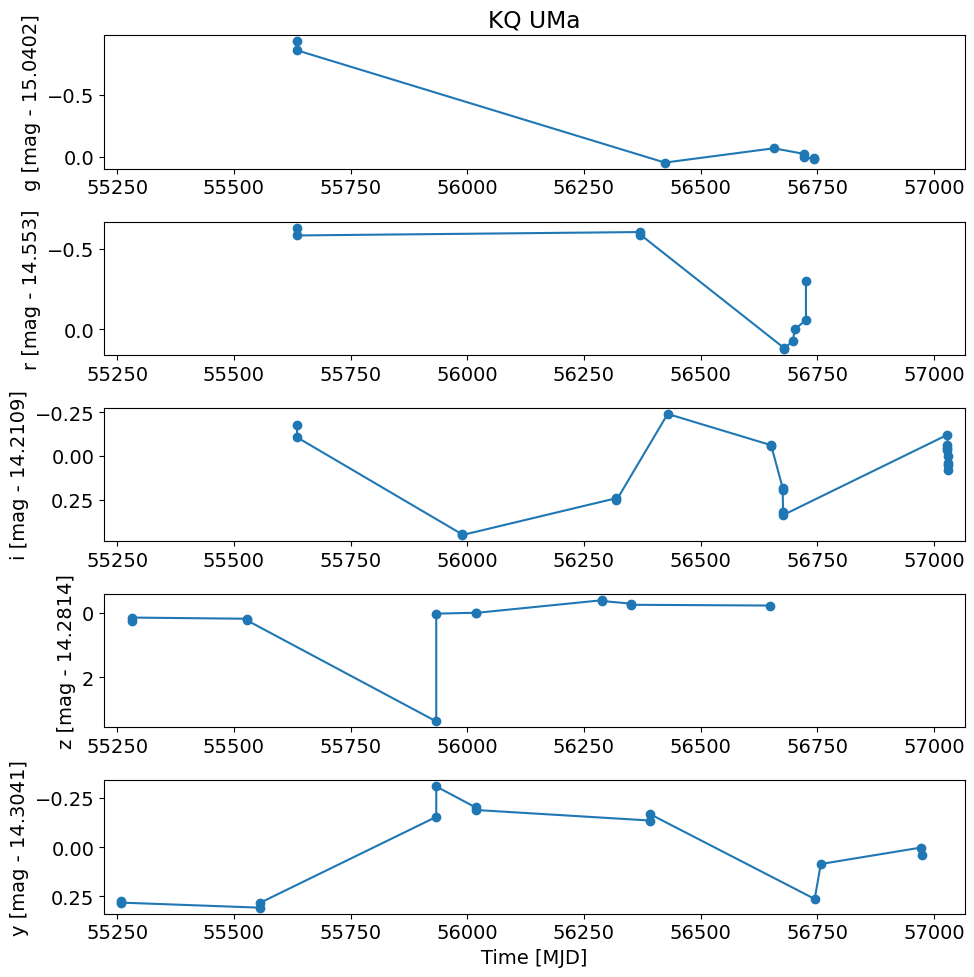

In [8]:
# convert flux in Jy to magnitudes
t = detection_TAP_results['obsTime']
mag = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

#detection_TAP_results['filterType'] is a byte string, compare accordingly:
for i, filter in enumerate(['g','r','i','z','y']):
    pylab.subplot(511+i)
    w = np.where(detection_TAP_results['filterType']==filter)
    magmean = TAP_results[f'{filter}MeanPSFMag'][0]
    pylab.plot(t[w],mag[w] - magmean,'-o')
    pylab.ylabel(f'{filter} [mag - {np.round(float(magmean), 4)}]')
    pylab.xlim(xlim)
    pylab.gca().invert_yaxis()
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Time [MJD]')
pylab.tight_layout()

### Identify bad data

There is one clearly bad $z$ magnitude with a very large difference.  Select the bad point and look at it in more detail.

Note that indexing a table (or numpy array) with a logical expression selects just the rows where that expression is true.

In [9]:
detection_TAP_results[ (detection_TAP_results['filterType']=='z') & (np.abs(mag-TAP_results['zMeanPSFMag'][0]) > 2) ]

<Table length=1>
      objID             detectID      filterid ...  infoFlag infoFlag2 infoFlag3
                                               ...                              
      int64              int64         uint8   ...   int64     int32     int32  
------------------ ------------------ -------- ... --------- --------- ---------
190361393344112894 183252627520000234        4 ... 102760453       128     32768

From examining this table, it looks like `psfQfPerfect` is bad.  This flag is the PSF-weighted fraction of unmasked pixels in the image (see the [documentation](https://outerspace.stsci.edu/x/IoOc) for more details). Values near unity indicate good data that is not significantly affected by bad pixels.

Check all the `psfQfPerfect` values for the $z$ filter to see if this value really is unusual.  The list of values below are sorted by magnitude.  The bad point is the only value with `psfQfPerfect` < 0.95.

In [10]:
w = np.where(detection_TAP_results['filterType']=='z')
zdtab = detection_TAP_results[w]
zdtab['mag'] = mag[w]
zdtab['dmag'] = zdtab['mag'] - TAP_results['zMeanPSFMag'][0]
ii = np.argsort(-np.abs(zdtab['dmag']))
zdtab = zdtab[ii]
zdtab['objID','obsTime','mag','dmag','psfQfPerfect']

<Table length=13>
      objID           obsTime       mag         dmag     psfQfPerfect
                         yr                                          
      int64           float64     float32     float32      float32   
------------------ ------------- --------- ------------- ------------
190361393344112894 55933.5264577  17.64412     3.3627195     0.322986
190361393344112894 56289.6159346 13.890659    -0.3907404     0.997811
190361393344112894 56289.6241112 13.916805   -0.36459446     0.988369
190361393344112894 56351.4168483 13.998972    -0.2824278     0.999257
190361393344112894 55281.2528285 14.537914    0.25651455      0.99754
190361393344112894  56351.424076 14.032501    -0.2488985     0.999187
190361393344112894 55527.6508919 14.512117    0.23071766     0.997265
190361393344112894 56648.5676019  14.05643   -0.22496986     0.997982
190361393344112894 55527.6381469  14.46514    0.18374062      0.99738
190361393344112894 55281.2625151 14.428554    0.14715385     0.955584
190361393344112894  55933.534515 14.307639   0.026239395     0.997489
190361393344112894 56019.2968782 14.278636 -0.0027637482     0.997654
190361393344112894 56019.3038014  14.28289   0.001490593     0.997338

### Repeat the plot with bad psfQfPerfect values excluded

Do the plot again but exclude low psfQfPerfect values.

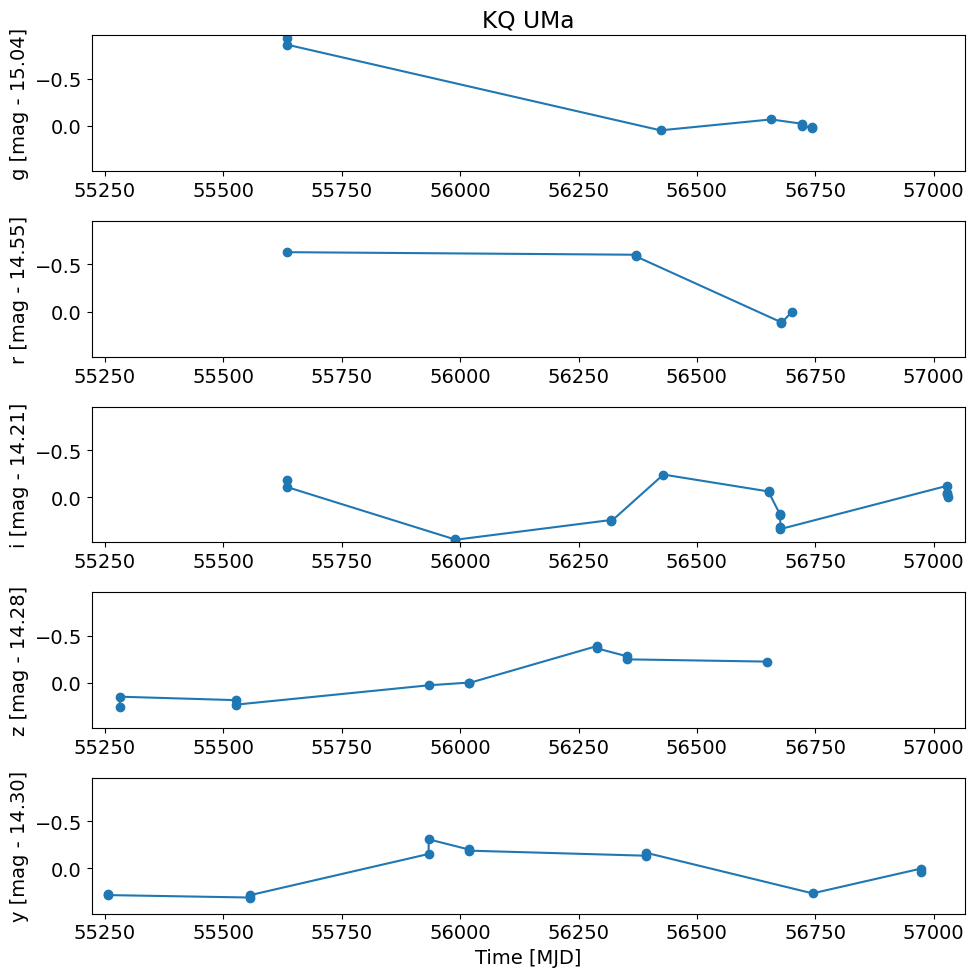

In [11]:
# convert flux in Jy to magnitudes
t = detection_TAP_results['obsTime']
mag = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
magmean = 0.0*mag
for i, filter in enumerate(['g','r','i','z','y']):
    magmean[detection_TAP_results['filterType']==filter] = TAP_results[f'{filter}MeanPSFMag'][0]

dmag = mag - magmean
dmag1 = dmag[detection_TAP_results['psfQfPerfect']>0.9]
# fix the x and y axis ranges
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])
# flip axis direction for magnitude
ylim = np.array([dmag1.max(),dmag1.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

for i, filter in enumerate(['g','r','i','z','y']):
    pylab.subplot(511+i)
    w = np.where((detection_TAP_results['filterType']==filter) & (detection_TAP_results['psfQfPerfect']>0.9))[0]
    pylab.plot(t[w],dmag[w],'-o')
    pylab.ylabel('{} [mag - {:.2f}]'.format(filter,magmean[w[0]]))
    pylab.xlim(xlim)
    pylab.ylim(ylim)
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Time [MJD]')
pylab.tight_layout()

### Plot versus the periodic phase instead of epoch

Plot versus phase using known RR Lyr period from Simbad (table [J/AJ/132/1202/table4](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/AJ/132/1202/table4&-c=KQ%20UMa&-c.u=arcmin&-c.r=2&-c.eq=J2000&-c.geom=r&-out.max=50&-out.form=HTML%20Table&-oc.form=sexa)).

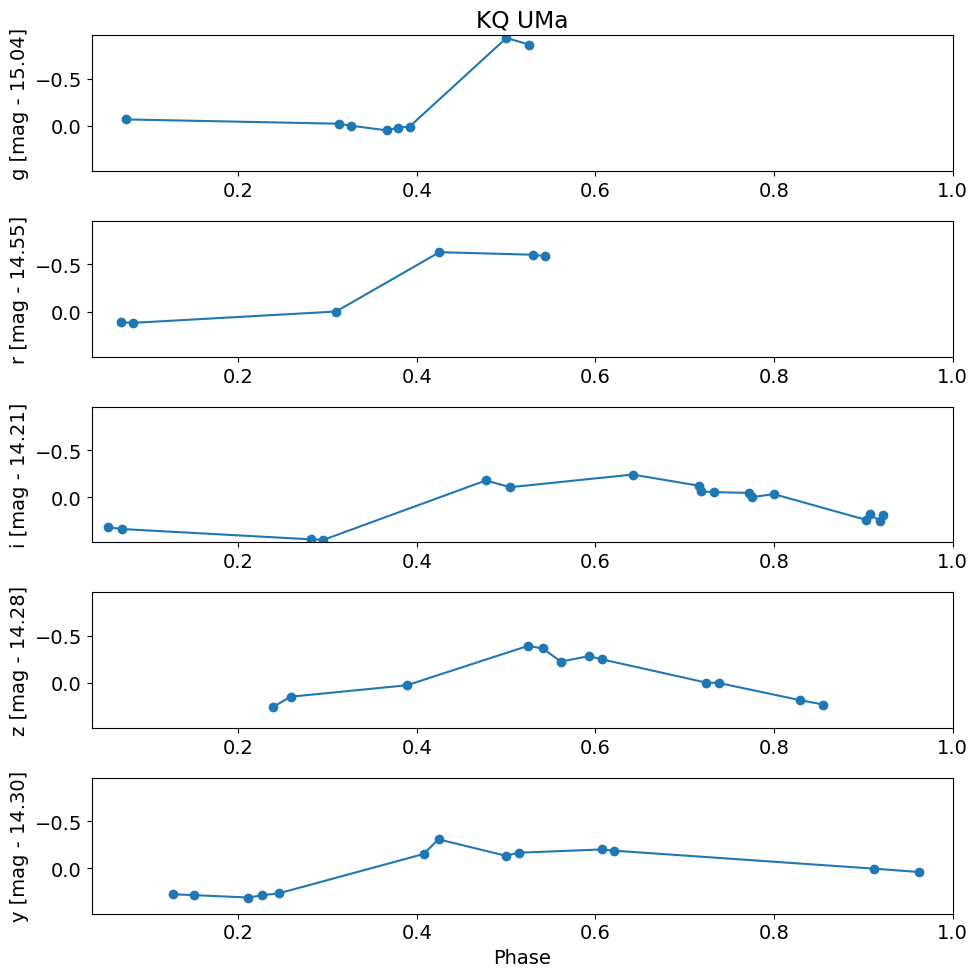

In [12]:
period = 0.48636 #days, from Simbad
# convert flux in Jy to magnitudes
t = (detection_TAP_results['obsTime'] % period) / period
mag = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
magmean = 0.0*mag
for i, filter in enumerate(['g','r','i','z','y']):
    magmean[detection_TAP_results['filterType']==filter] = TAP_results[f'{filter}MeanPSFMag'][0]
    
dmag = mag - magmean
dmag1 = dmag[detection_TAP_results['psfQfPerfect']>0.9]
# fix the x and y axis ranges
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])
# flip axis direction for magnitude
ylim = np.array([dmag1.max(),dmag1.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

for i, filter in enumerate(['g','r','i','z','y']):
    pylab.subplot(511+i)
    w = np.where((detection_TAP_results['filterType']==filter) & (detection_TAP_results['psfQfPerfect']>0.9))[0]
    w = w[np.argsort(t[w])]
    pylab.plot(t[w],dmag[w],'-o')
    pylab.ylabel('{} [mag - {:.2f}]'.format(filter,magmean[w[0]]))
    pylab.xlim(xlim)
    pylab.ylim(ylim)
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Phase')
pylab.tight_layout()

## Repeat search using eclipsing binary KIC 2161623

From [Villanova Kepler Eclipsing Binaries](http://keplerebs.villanova.edu)

In [13]:
objname = 'KIC 2161623'
coords = Mast.resolve_object(objname)
ra,dec = coords.ra.value,coords.dec.value
radius = 1.0/3600.0 # radius = 1 arcsec

query = """
SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',{},{},{}))=1
AND nDetections > 1
""".format(ra,dec,radius)
print(query)

job = TAP_service.run_async(query)
TAP_results = job.to_table()
TAP_results


SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',291.744461,37.59102,0.0002777777777777778))=1
AND nDetections > 1



<Table length=1>
      objID              RAMean       ... zMeanPSFMag yMeanPSFMag
                          deg         ...     mag         mag    
      int64             float64       ...   float32     float32  
------------------ ------------------ ... ----------- -----------
153102917444859851 291.74446283634614 ...     14.2004     14.0672

### Get Repeated Detection Information

This time include the `psfQfPerfect` limit directly in the database query.

In [14]:
objid = TAP_results['objID'][0]

query = """
SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID={}
AND psfQfPerfect >= 0.9
ORDER BY filterID, obsTime
""".format(objid)
print(query)

job = TAP_service.run_async(query)
detection_TAP_results = job.to_table()

# add magnitude and difference from mean
detection_TAP_results['magmean'] = 0.0
for i, filter in enumerate([b'g',b'r',b'i',b'z',b'y']):
    detection_TAP_results['magmean'][detection_TAP_results['filterType']==filter] = TAP_results[filter.decode('ascii')+'MeanPSFMag'][0]
detection_TAP_results['mag'] = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
detection_TAP_results['dmag'] = detection_TAP_results['mag']-detection_TAP_results['magmean']

detection_TAP_results


SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID=153102917444859851
AND psfQfPerfect >= 0.9
ORDER BY filterID, obsTime



<Table length=45>
      objID             detectID      filterid ...    mag           dmag       
                                               ...                             
      int64              int64         uint8   ...  float32       float64      
------------------ ------------------ -------- ... --------- ------------------
153102917444859851  90150443710000088        1 ... 14.650389 14.650388717651367
153102917444859851  90151959710000087        1 ... 14.680433  14.68043327331543
153102917444859851 131534996560000129        1 ... 14.598316 14.598316192626953
153102917444859851 131536180650000138        1 ... 14.583125 14.583125114440918
153102917444859851 204528930560000076        1 ... 14.604994  14.60499382019043
153102917444859851 204530041560000085        1 ... 14.602627  14.60262680053711
153102917444859851 241032265120000094        1 ... 14.592098 14.592098236083984
153102917444859851 241033321120000081        1 ... 14.593643 14.593643188476562
153102917444859851  91252543710000102        2 ... 14.286878 14.286877632141113
               ...                ...      ... ...       ...                ...
153102917444859851 159961616410000125        5 ... 14.054594 14.054594039916992
153102917444859851 160460087410000136        5 ... 14.090706 14.090705871582031
153102917444859851 160461274410000134        5 ... 14.081092  14.08109188079834
153102917444859851 171734372010000127        5 ... 14.014952 14.014951705932617
153102917444859851 171735523010000129        5 ... 14.021795 14.021795272827148
153102917444859851 194462075640000160        5 ... 14.012812 14.012811660766602
153102917444859851 194462752640000158        5 ... 14.036769 14.036768913269043
153102917444859851 213319324300000159        5 ... 14.074984 14.074983596801758
153102917444859851 213319880300000163        5 ... 14.073626 14.073625564575195
153102917444859851 245335559360000173        5 ... 14.050322 14.050321578979492

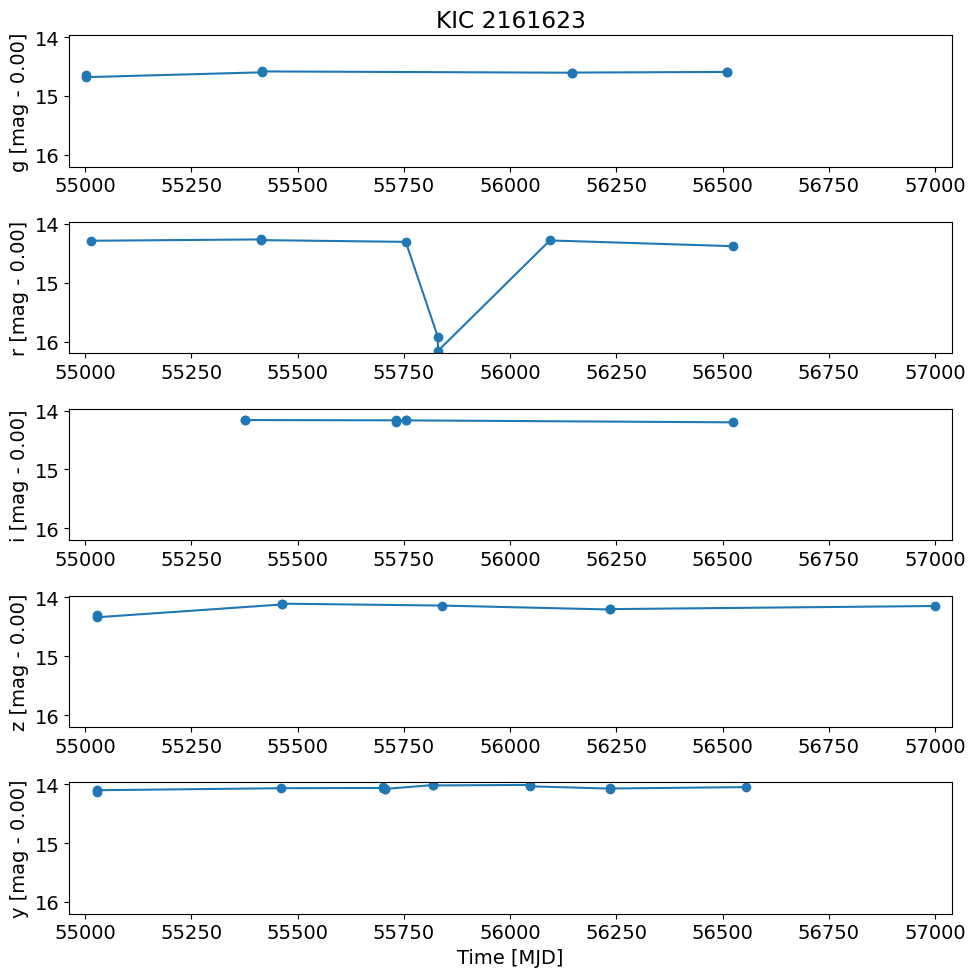

In [15]:
t = detection_TAP_results['obsTime']
dmag = detection_TAP_results['dmag']
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])
ylim = np.array([dmag.max(),dmag.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

for i, filter in enumerate(['g','r','i','z','y']):
    pylab.subplot(511+i)
    w = np.where(detection_TAP_results['filterType']==filter)[0]
    pylab.plot(t[w],dmag[w],'-o')
    magmean = detection_TAP_results['magmean'][w[0]]
    pylab.ylabel('{} [mag - {:.2f}]'.format(filter,magmean))
    pylab.xlim(xlim)
    pylab.ylim(ylim)
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Time [MJD]')
pylab.tight_layout()

### Plot versus phase using known period

Eclipsing binaries basically vary by same amount in all filters since it is a geometrical effect, so combine the data into a single light curve.  Wrap using known period and plot versus phase.

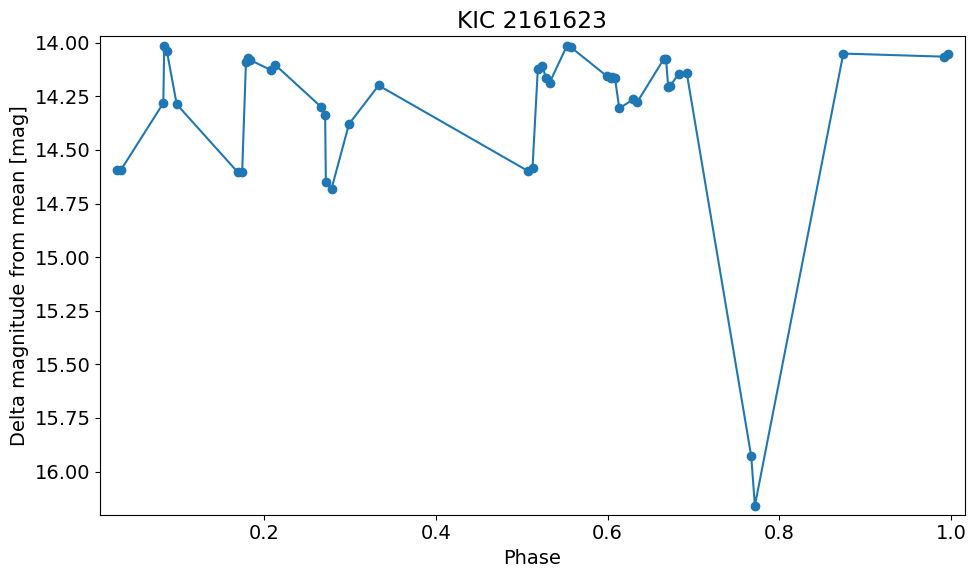

In [16]:
period = 2.2834698
bjd0 = 54999.599837
t = ((detection_TAP_results['obsTime']-bjd0) % period) / period
dmag = detection_TAP_results['dmag']
w = np.argsort(t)
t = t[w]
dmag = dmag[w]
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])
ylim = np.array([dmag.max(),dmag.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,6))
pylab.plot(t,dmag,'-o')
pylab.xlim(xlim)
pylab.ylim(ylim)
pylab.xlabel('Phase')
pylab.ylabel('Delta magnitude from mean [mag]')
pylab.title(objname)
pylab.tight_layout()

## Repeat search for another eclipsing binary KIC 8153568

In [17]:
objname = 'KIC 8153568'
coords = Mast.resolve_object(objname)
ra,dec = coords.ra.value,coords.dec.value
radius = 1.0/3600.0 # radius = 1 arcsec

query = """
SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',{},{},{}))=1
AND nDetections > 1
""".format(ra,dec,radius)
print(query)

job = TAP_service.run_async(query)
TAP_results = job.to_table()
TAP_results


SELECT objID, RAMean, DecMean, nDetections, ng, nr, ni, nz, ny, gMeanPSFMag, rMeanPSFMag, iMeanPSFMag, zMeanPSFMag, yMeanPSFMag
FROM dbo.MeanObjectView
WHERE
CONTAINS(POINT('ICRS', RAMean, DecMean),CIRCLE('ICRS',286.90445,44.00551,0.0002777777777777778))=1
AND nDetections > 1



<Table length=1>
      objID              RAMean       ... zMeanPSFMag yMeanPSFMag
                          deg         ...     mag         mag    
      int64             float64       ...   float32     float32  
------------------ ------------------ ... ----------- -----------
160802869044447231 286.90445005122217 ...     15.1999     14.8484

In [18]:
objid = TAP_results['objID'][0]
query = """
SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID={}
AND psfQfPerfect >= 0.9
ORDER BY filterID, obsTime
""".format(objid)
print(query)

job = TAP_service.run_async(query)
detection_TAP_results = job.to_table()

# add magnitude and difference from mean
detection_TAP_results['magmean'] = 0.0
for i, filter in enumerate([b'g',b'r',b'i',b'z',b'y']):
    detection_TAP_results['magmean'][detection_TAP_results['filterType']==filter] = TAP_results[filter.decode('ascii')+'MeanPSFMag'][0]
detection_TAP_results['mag'] = -2.5*np.log10(detection_TAP_results['psfFlux']) + 8.90
detection_TAP_results['dmag'] = detection_TAP_results['mag']-detection_TAP_results['magmean']

detection_TAP_results


SELECT
    objID, detectID, Detection.filterID as filterID, Filter.filterType, obsTime, ra, dec,
    psfFlux, psfFluxErr, psfMajorFWHM, psfMinorFWHM, psfQfPerfect, 
    apFlux, apFluxErr, infoFlag, infoFlag2, infoFlag3
FROM Detection
NATURAL JOIN Filter
WHERE objID=160802869044447231
AND psfQfPerfect >= 0.9
ORDER BY filterID, obsTime



<Table length=60>
      objID             detectID      filterid ...    mag            dmag       
                                               ...                              
      int64              int64         uint8   ...  float32        float64      
------------------ ------------------ -------- ... ---------- ------------------
160802869044447231  91336429430000113        1 ... 15.1684475 15.168447494506836
160802869044447231  91337480430000116        1 ...  15.160945 15.160944938659668
160802869044447231 126057565120000092        1 ...  15.173092 15.173091888427734
160802869044447231 126058741130000111        1 ...  15.197056  15.19705581665039
160802869044447231 128744126310000284        1 ...   16.63354   16.6335391998291
160802869044447231 128745341310000249        1 ...  16.419983  16.41998291015625
160802869044447231 164544841720000097        1 ...  15.183374 15.183374404907227
160802869044447231 164744408530000111        1 ...  15.192612 15.192611694335938
160802869044447231 164745526530000113        1 ...  15.190218 15.190217971801758
               ...                ...      ... ...        ...                ...
160802869044447231 281422935550000135        4 ...   14.88069  14.88068962097168
160802869044447231 136027009120000145        5 ...  14.816912 14.816911697387695
160802869044447231 136028204120000148        5 ...  14.848459 14.848459243774414
160802869044447231 159959993400000147        5 ...  14.892184 14.892184257507324
160802869044447231 159961165400000142        5 ...  14.868922 14.868922233581543
160802869044447231 160459626400000159        5 ...  15.099305 15.099305152893066
160802869044447231 160460795400000171        5 ...  15.133081 15.133081436157227
160802869044447231 171023586640000136        5 ...   14.83816 14.838159561157227
160802869044447231 171024776640000151        5 ... 14.8289585 14.828958511352539
160802869044447231 245335002470000153        5 ...  14.823693  14.82369327545166

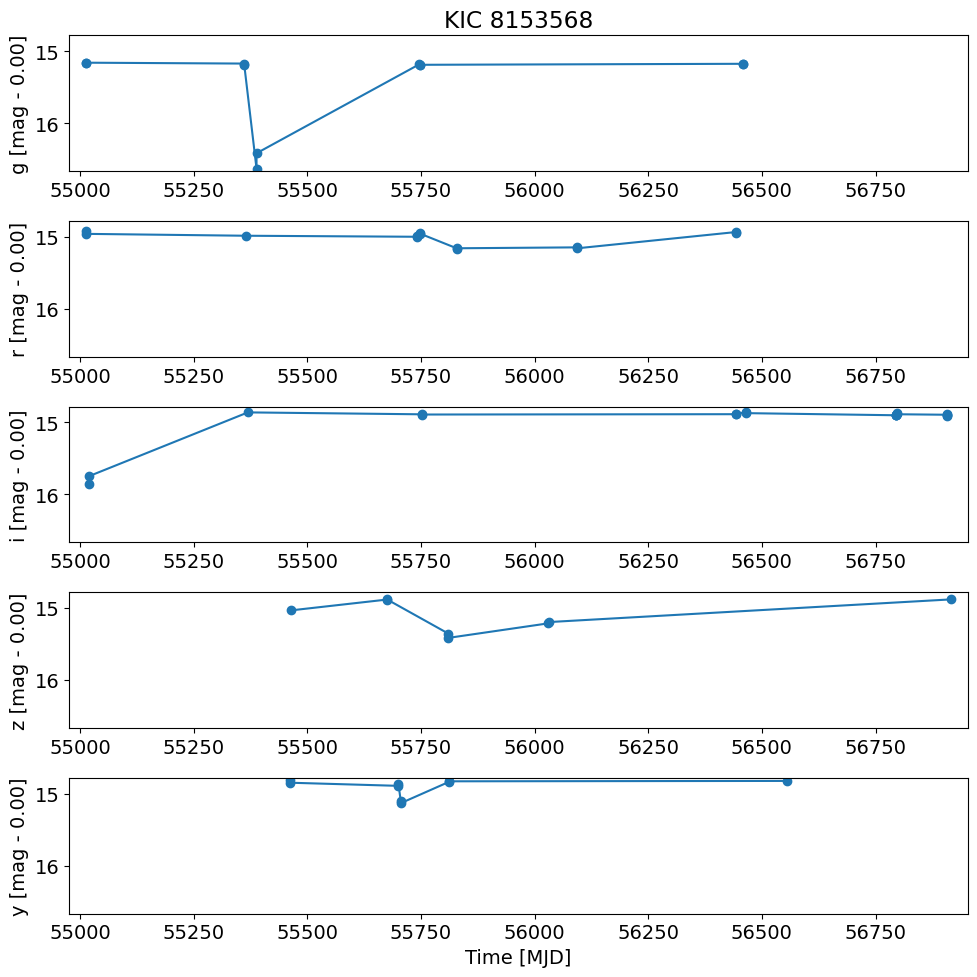

In [19]:
t = detection_TAP_results['obsTime']
dmag = detection_TAP_results['dmag']
xlim = np.array([t.min(),t.max()])
xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])
ylim = np.array([dmag.max(),dmag.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(10,10))

for i, filter in enumerate(['g','r','i','z','y']):
    pylab.subplot(511+i)
    w = np.where(detection_TAP_results['filterType']==filter)[0]
    pylab.plot(t[w],dmag[w],'-o')
    magmean = detection_TAP_results['magmean'][w[0]]
    pylab.ylabel('{} [mag - {:.2f}]'.format(filter,magmean))
    pylab.xlim(xlim)
    pylab.ylim(ylim)
    if i==0:
        pylab.title(objname)
        
pylab.xlabel('Time [MJD]')
pylab.tight_layout()

Eclipsing binaries basically vary by same amount in all filters since it is a geometrical effect, so combine the data into a single light curve.

Wrap using known period and plot versus phase.  Plot two periods of the light curve this time.

This nice light curve appears to show a secondary eclipse.

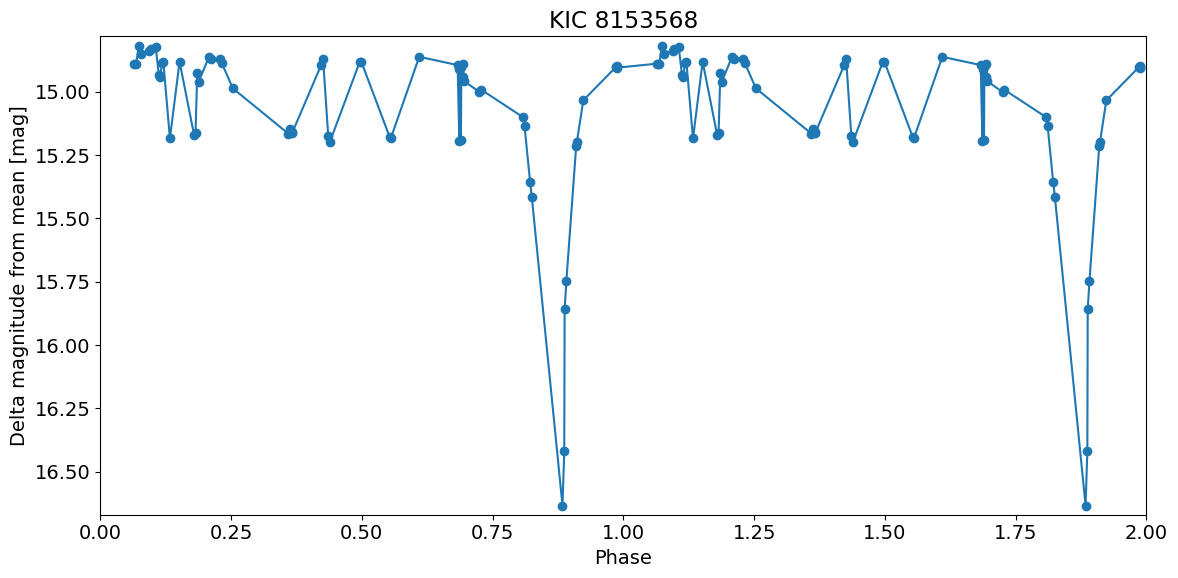

In [20]:
period = 3.6071431
bjd0 = 54999.289794
t = ((detection_TAP_results['obsTime']-bjd0) % period) / period
dmag = detection_TAP_results['dmag']
w = np.argsort(t)
# extend to two periods
nw = len(w)
w = np.append(w,w)
t = t[w]
# add one to second period
t[-nw:] += 1
dmag = dmag[w]
xlim = [0,2.0]
ylim = np.array([dmag.max(),dmag.min()])
ylim = ylim + np.array([-1,1])*0.02*(ylim[1]-ylim[0])

pylab.rcParams.update({'font.size': 14})
pylab.figure(1,(12,6))
pylab.plot(t,dmag,'-o')
pylab.xlim(xlim)
pylab.ylim(ylim)
pylab.xlabel('Phase')
pylab.ylabel('Delta magnitude from mean [mag]')
pylab.title(objname)
pylab.tight_layout()

***
# Additional Resources


## Table Access Protocol 
* IVOA standard for RESTful web service access to tabular data
* http://www.ivoa.net/documents/TAP/

## PanSTARRS 1 DR 2
* Catalog for PanSTARRS with additional Detection information
* https://outerspace.stsci.edu/display/PANSTARRS/

## Astronomical Query Data Language (2.0)
* IVOA standard for querying astronomical data in tabular format, with geometric search support
* http://www.ivoa.net/documents/latest/ADQL.html

## PyVO
* an affiliated package for astropy
* find and retrieve astronomical data available from archives that support standard IVOA virtual observatory service protocols.
* https://pyvo.readthedocs.io/en/latest/index.html

***

## About this Notebook
**Authors:** Rick White & Theresa Dower, STScI Archive Scientist & Software Engineer <br>
**Last Updated:** Feb 2024

For support, please contact the Archive HelpDesk at archive@stsci.edu.

***
 <img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>

[Return to top of page](#top)